In [330]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [302]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [303]:
selected_labels = [0 , 2 , 5]
mask = np.isin(y_train, selected_labels)
x_train_f = x_train[mask]
y_train_f = y_train[mask]

In [304]:
label_map = {0: 0, 2: 1, 5: 2}
y_train_f = np.array([label_map[label] for label in y_train_f])

In [305]:
x_train_f = x_train_f/255.0

# Define Custom layer

In [318]:
class My_layer(keras.layers.Layer):
    def __init__(self , units ):
        super(My_layer, self).__init__()
        self.units = units
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                             initializer="random_normal",
                             trainable=True)
        self.v = self.add_weight(shape=(input_shape[-1] , self.units),
                             initializer="random_normal",
                             trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                             initializer="random_normal",
                             trainable=True)
    def call(self, inputs):
        #x = tf.expand_dims(inputs, axis=-1)
        return tf.matmul(tf.pow(inputs,3), self.v) - tf.matmul(inputs , self.w) + self.b

In [319]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(150 , activation = 'relu'),
    keras.layers.Dense(100 , activation = 'relu'),
    My_layer(units=50),
    keras.layers.Dense(3 , activation = 'softmax') 
])

In [320]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [321]:
history = model.fit(x_train_f , y_train_f ,  epochs=50 , validation_split=0.2)

Epoch 1/50
433/433 [==============================] - 2s 2ms/step - loss: 0.2963 - accuracy: 0.8925 - val_loss: 0.1199 - val_accuracy: 0.9688
Epoch 2/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9741 - val_loss: 0.0897 - val_accuracy: 0.9766
Epoch 3/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 0.9810 - val_loss: 0.0827 - val_accuracy: 0.9783
Epoch 4/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0688 - val_accuracy: 0.9821
Epoch 5/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0714 - val_accuracy: 0.9824
Epoch 6/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.9912 - val_loss: 0.0581 - val_accuracy: 0.9853
Epoch 7/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0583 - val_accuracy: 0.9850
Epoch 

# Define a simple model

In [326]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100 , activation = 'relu'),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dense(3 , activation = 'softmax') 
])

In [327]:
model2.compile(optimizer='sgd',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history2 = model2.fit(x_train_f , y_train_f ,  epochs=50 , validation_split=0.2)

Epoch 1/50
433/433 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.9110 - val_loss: 0.1331 - val_accuracy: 0.9593
Epoch 2/50
433/433 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9697 - val_loss: 0.1054 - val_accuracy: 0.9674
Epoch 3/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9746 - val_loss: 0.0930 - val_accuracy: 0.9694
Epoch 4/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9772 - val_loss: 0.0873 - val_accuracy: 0.9723
Epoch 5/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9796 - val_loss: 0.0809 - val_accuracy: 0.9737
Epoch 6/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0771 - val_accuracy: 0.9757
Epoch 7/50
433/433 [==============================] - 1s 2ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0714 - val_accuracy: 0.9760
Epoch 

# Plot the Graph

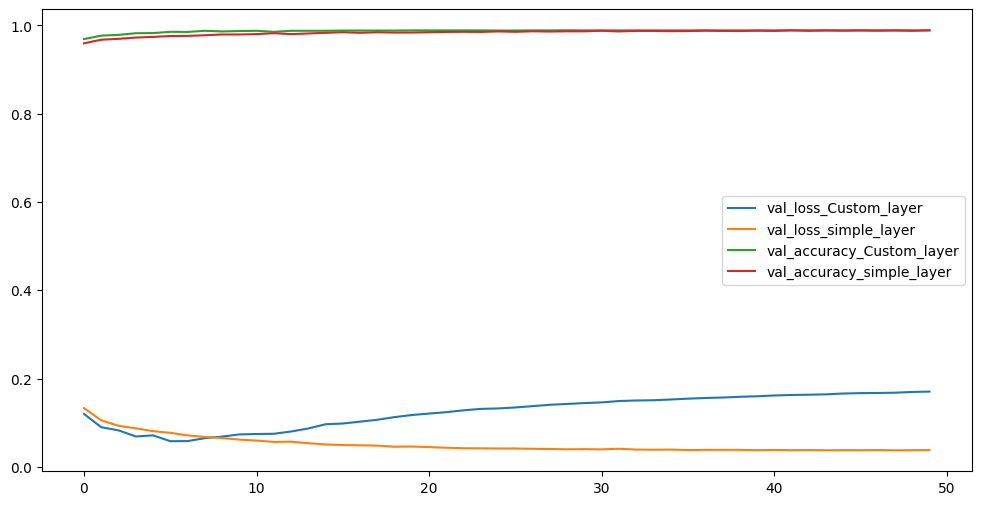

In [331]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(history.history["val_loss"], label="val_loss_Custom_layer")
ax.plot(history2.history["val_loss"], label="val_loss_simple_layer")
ax.plot(history.history["val_accuracy"], label="val_accuracy_Custom_layer")
ax.plot(history2.history["val_accuracy"], label="val_accuracy_simple_layer")
ax.legend()